# Calculate topology of a fracture network and plotting

This notebook will show how to calculate the topology for the Pontrelli dataset, plot the ternary diagram and the backbone.

In [1]:
from fracability.examples import data  # import the path of the sample data
from fracability import Entities  # import the Entities class

## Create fracture network entity

In [2]:
pontrelli_data = data.Pontrelli()
data_dict = pontrelli_data.data_dict  # Get dict of paths for the data

# Create the fractures and boundary objects. 
set_a = Entities.Fractures(shp=data_dict['Set_a.shp'], set_n=1)  # to add your data put the absolute path of the shp file
set_b = Entities.Fractures(shp=data_dict['Set_b.shp'], set_n=2)
set_c = Entities.Fractures(shp=data_dict['Set_c.shp'], set_n=3)

boundary = Entities.Boundary(shp=data_dict['Interpretation_boundary.shp'], group_n=1)

fracture_net = Entities.FractureNetwork()

fracture_net.add_fractures(set_a)
fracture_net.add_fractures(set_b)
fracture_net.add_fractures(set_c)
fracture_net.add_boundaries(boundary)

## Calculate the topology of the network

the calculate_topology method calculates the topology of the network with also the node origin. By node origin we define which entities are related to the given node e.g.:

+ I node with node origin [x] -> related to a fracture of set x
+ Y node with node origin [x, y] -> related to a fracture of set x abutting on a fracture of set y
+ Y node with node origin [x, x] -> related to the intersection of fractures of the same set x
+ U node with node origin [x, b] -> related to a fracture of set x intersecting the boundary (b)
+ Y node with node origin [x, y, z] -> triple intersection, makes no sense -> problem in the geometry
+ X node with node origin [x, y] -> related to the intersection of fractures of set x and y
+ X node with node origin [w, x, y, z] -> quadruple intersection, makes no sense -> problem in the geometry

In [3]:
fracture_net.calculate_topology()




Calculating intersections on fracture: 4272/4272

Invalid point for lines: [439 255 503] 

sets: [1 2 3], 

The node will be classified accordingly to the number of intersection however, the intersection must be checked!


### Plot the network

In [4]:
fracture_net.vtk_plot()

Widget(value='<iframe src="http://localhost:39989/index.html?ui=P_0x7c40fddab790_0&reconnect=auto" class="pyvi…

 JS Error => error: TypeError: can't convert BigInt to number


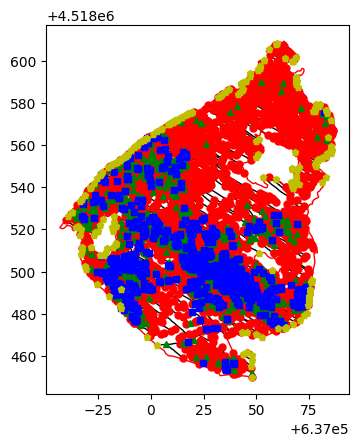

In [5]:
fracture_net.mat_plot()

### Plot the ternary diagram and return the number of nodes

/home/gabriele/.local/lib/python3.10/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


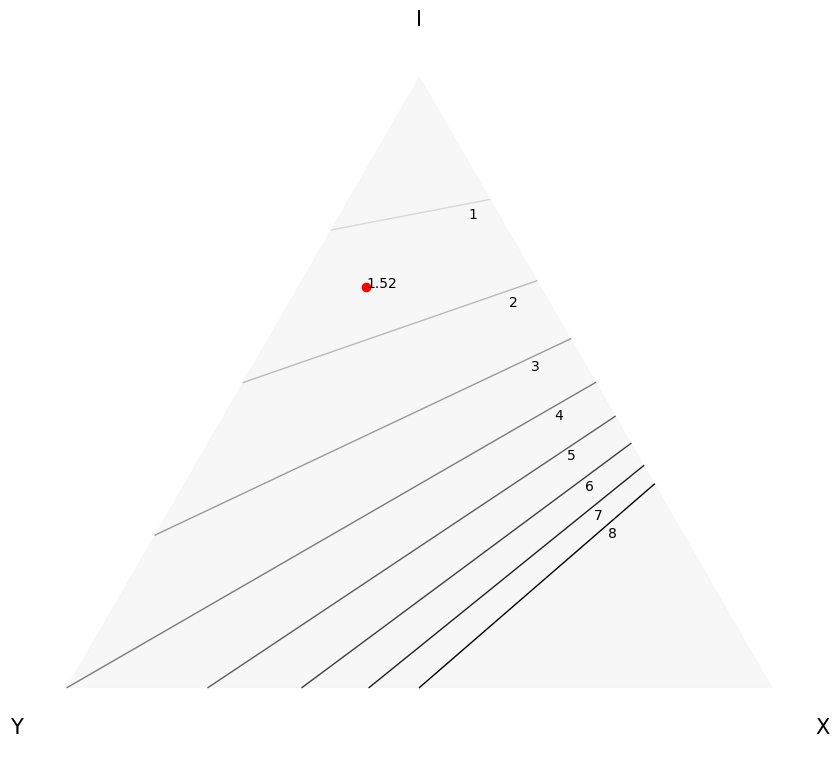

In [6]:
fracture_net.ternary_plot()

In [7]:
fracture_net.nodes.node_count # 1 = I, 3 = Y, 4 = X and 5 = U

{np.int64(1): np.int64(6037),
 np.int64(3): np.int64(2284),
 np.int64(4): np.int64(886),
 np.int64(5): np.int64(212)}

### Plot the backbone

In [8]:
fracture_net.backbone_plot()

Widget(value='<iframe src="http://localhost:39989/index.html?ui=P_0x7c40ec96a0b0_4&reconnect=auto" class="pyvi…